In [1]:
import Pkg
Pkg.activate(".")
Pkg.add("XLSX")
using XLSX  

  Activating project at `C:\Users\Owner`
    Updating registry at `C:\Users\Owner\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
Precompiling project...
  ✗ BinaryProvider
  ✓ Polynomials → PolynomialsMakieCoreExt
  ✓ Pango_jll
  ✓ SparseConnectivityTracer → SparseConnectivityTracerNNlibExt
  ✓ Zygote → ZygoteDistancesExt
  ✓ Qt5Base_jll
  ✓ FFMPEG
  ✓ Transducers → TransducersLazyArraysExt
  ✓ MLDataDevices → MLDataDevicesRecursiveArrayToolsExt
  ✓ Transducers → TransducersBlockArraysExt
  ✓ SparseDiffTools → SparseDiffToolsZygoteExt
  ✓ ImageSegmentation
  ✓ DomainSets → DomainSetsMakieExt
  ✓ Cairo
  ✓ ImageCorners
  ✓ OrdinaryDiffEqCore
  ✓ GR_jll
  ✓ OptimizationBase
  ✓ ImageQualityIndexes
  ✓ OrdinaryDiffEqCore → OrdinaryDiffEqCoreEnzymeCoreExt
  ✓ MLDatasets
  ✓ Symbolics → SymbolicsLuxExt
  ✓ OptimizationBase → OptimizationFiniteDiffExt
  ✓ OptimizationBase → Optimiza

In [2]:
Pkg.add("MultivariateStats")
using MultivariateStats

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [3]:
Pkg.add(["Statistics","LinearAlgebra"])

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [4]:
Pkg.add(["Random","Images","Colors","CairoMakie","DataFrames"])

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [5]:
using LinearAlgebra
using Plots, Statistics
using Random

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [6]:
using Images, Colors, CairoMakie, DataFrames

In [7]:
xf = XLSX.readxlsx("3mT.xlsx")
df = xf["Sheet1"]
M=df["C2:F201"]
data = M

200×4 Matrix{Any}:
      3.69808e5       3.97031e5       4.65044e5       5.74216e5
      2.64438e7       2.45904e7       2.50684e7       3.77965e7
      2.5715e5        1.71653e5       1.62756e5       3.58535e5
      6.81926e5       5.04844e5       5.51416e5       1.23278e6
      1.3678e6        1.53323e6       1.12762e6       2.70758e6
      1.23053e6       1.58128e6       1.61016e6       1.50047e6
      6.95783e5  884800.0             7.72369e5       1.205e6
      2.89878e5       1.76327e5       3.53243e5       2.44836e5
      7.41966e6       5.36596e6       6.18108e6       1.46264e7
      2.26798e5       1.97177e5       1.97987e5       4.01538e5
 943798.0             8.21463e5       8.95664e5       9.71573e5
 286833.0             2.25856e5  317211.0             2.16647e5
      3.02843e5       1.12615e5       1.2818e5   294361.0
      ⋮                                          
  10004.5          3581.38         9571.1          9609.98
      3.91167e5       3.21946e5       3.30433e5 

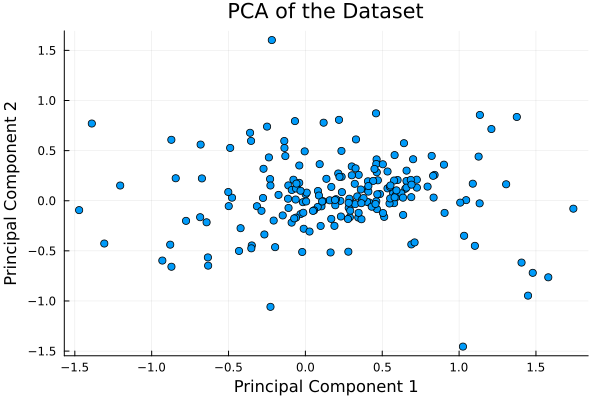

In [8]:
# 标准化数据（零均值化）
m = log.(M)
data_centered = m .- mean(m, dims=2)

# 计算协方差矩阵
cov_matrix = cov(data_centered)

# 进行特征值分解
eigvals, eigvecs = eigen(cov_matrix)

# 按照特征值排序，选择前两个主成分
sorted_indices = sortperm(eigvals, rev=true)
top_eigenvectors = eigvecs[:, sorted_indices[1:2]]  # 选择前两个主成分

# 将数据映射到前两个主成分
transformed_data = data_centered * top_eigenvectors

# 绘制PCA的前两个主成分
Plots.scatter(transformed_data[:, 1], transformed_data[:, 2],
        xlabel="Principal Component 1", ylabel="Principal Component 2",
        title="PCA of the Dataset",legend = nothing)

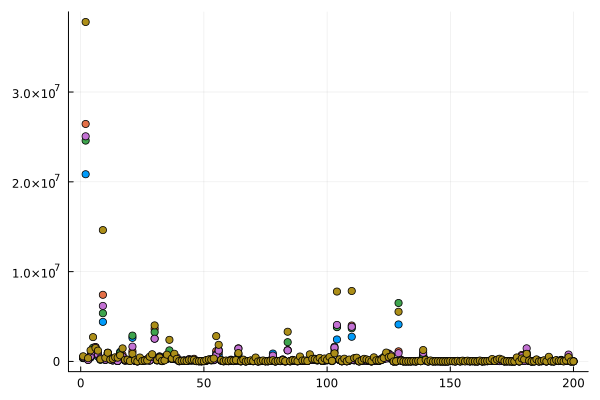

In [27]:
blank=df["A2:B201"]
F2D=df["C2:C201"]
F5PG=df["D2:D201"]
P5PG=df["E2:E201"]
Psus=df["F2:F201"]
ft=df["A2:A201"]

Plots.scatter(blank[:,2],  legend = nothing)
Plots.scatter!(F2D[:,1],  legend = nothing)
Plots.scatter!(F5PG[:,1],  legend = nothing)
Plots.scatter!(P5PG[:,1],legend = nothing)
Plots.scatter!(Psus[:,1],  legend = nothing)

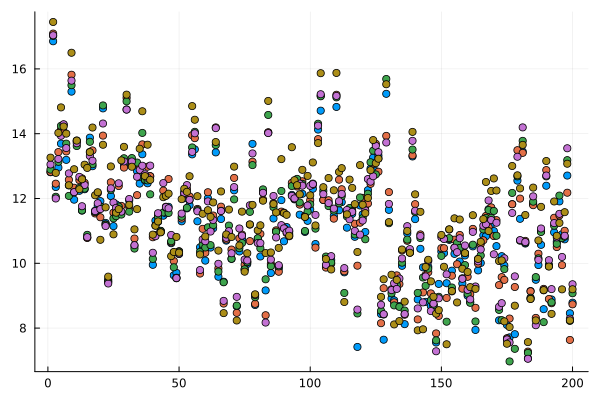

In [99]:
blank=df["A2:B201"]
F2D=df["C2:C201"]
F5PG=df["D2:D201"]
P5PG=df["E2:E201"]
Psus=df["F2:F201"]
blank=log.(blank)
F2D=log.(F2D)
F5PG=log.(F5PG)
P5PG=log.(P5PG)
Psus=log.(Psus)

Plots.scatter(blank[:,2],  legend = nothing)
Plots.scatter!(F2D[:,1],  legend = nothing)
Plots.scatter!(F5PG[:,1],  legend = nothing)
Plots.scatter!(P5PG[:,1],legend = nothing)
Plots.scatter!(Psus[:,1],  legend = nothing)

In [54]:
x = Array((Ym)')

200×3 Matrix{Float64}:
  -3.43428   -0.156172   -0.0459809
 -11.7192    -0.300655    0.00468028
  -2.08423    0.207481    0.194639
  -4.33945    0.220267    0.184237
  -5.99362    0.178765   -0.144688
  -5.81971   -0.471821   -0.209763
  -4.77873   -0.0655257  -0.200436
  -2.33185   -0.53352     0.356158
  -9.15944    0.141808    0.216919
  -2.24448    0.201566    0.0660761
  -4.8523    -0.366935    0.0289601
  -2.33353   -0.614722    0.113113
  -1.73785    0.204174    0.558868
   ⋮                     
   4.71087   -0.0254899   0.75699
  -3.13876   -0.0421052   0.0759545
   3.1804    -0.121764   -0.565484
   4.99309   -0.650627   -0.0413427
  -0.290023   0.230691    0.140464
   1.20561   -0.138907   -0.0642584
  -0.57849   -0.619126   -0.592986
   2.55076   -1.09289    -0.781415
   0.439416   0.296584    0.0970737
  -3.40318   -0.486998   -0.537213
   6.38483   -0.0261588  -0.365799
   4.40137   -0.145234   -0.184646

In [55]:
x1 = [Point3f(xx...) for xx in eachrow(x[1:66,1:3])]
x2 = [Point3f(xx...) for xx in eachrow(x[67:132,1:3])]
x3 = [Point3f(xx...) for xx in eachrow(x[133:200,1:3])]

68-element Vector{Point{3, Float32}}:
 [3.7508104, -0.051435046, 0.07465681]
 [4.726874, -1.097887, 0.4283101]
 [2.0795732, -0.034671463, 0.18710557]
 [5.4688797, 0.1659626, -0.1379679]
 [0.7974331, -0.2542959, 0.014468812]
 [1.8653626, -0.30423382, -0.069545776]
 [-4.7631593, -0.08418068, -0.06260436]
 [-1.0045621, 0.063806154, 0.11635504]
 [5.6499104, -0.7034295, -0.7112623]
 [0.5131415, 0.33815673, 0.07340035]
 [4.8937464, -1.0144095, -0.62705016]
 [3.3604333, 0.07667795, 0.21421523]
 [2.7128472, -0.08829993, -0.059258375]
 ⋮
 [4.710869, -0.025489947, 0.75698996]
 [-3.138763, -0.042105246, 0.07595445]
 [3.1803951, -0.12176424, -0.5654844]
 [4.9930873, -0.65062726, -0.041342698]
 [-0.29002333, 0.23069067, 0.14046371]
 [1.2056063, -0.13890702, -0.06425838]
 [-0.5784898, -0.6191263, -0.5929858]
 [2.5507574, -1.0928898, -0.78141534]
 [0.43941557, 0.2965836, 0.09707371]
 [-3.4031792, -0.4869976, -0.53721297]
 [6.3848324, -0.026158765, -0.3657991]
 [4.4013696, -0.14523377, -0.1846462]

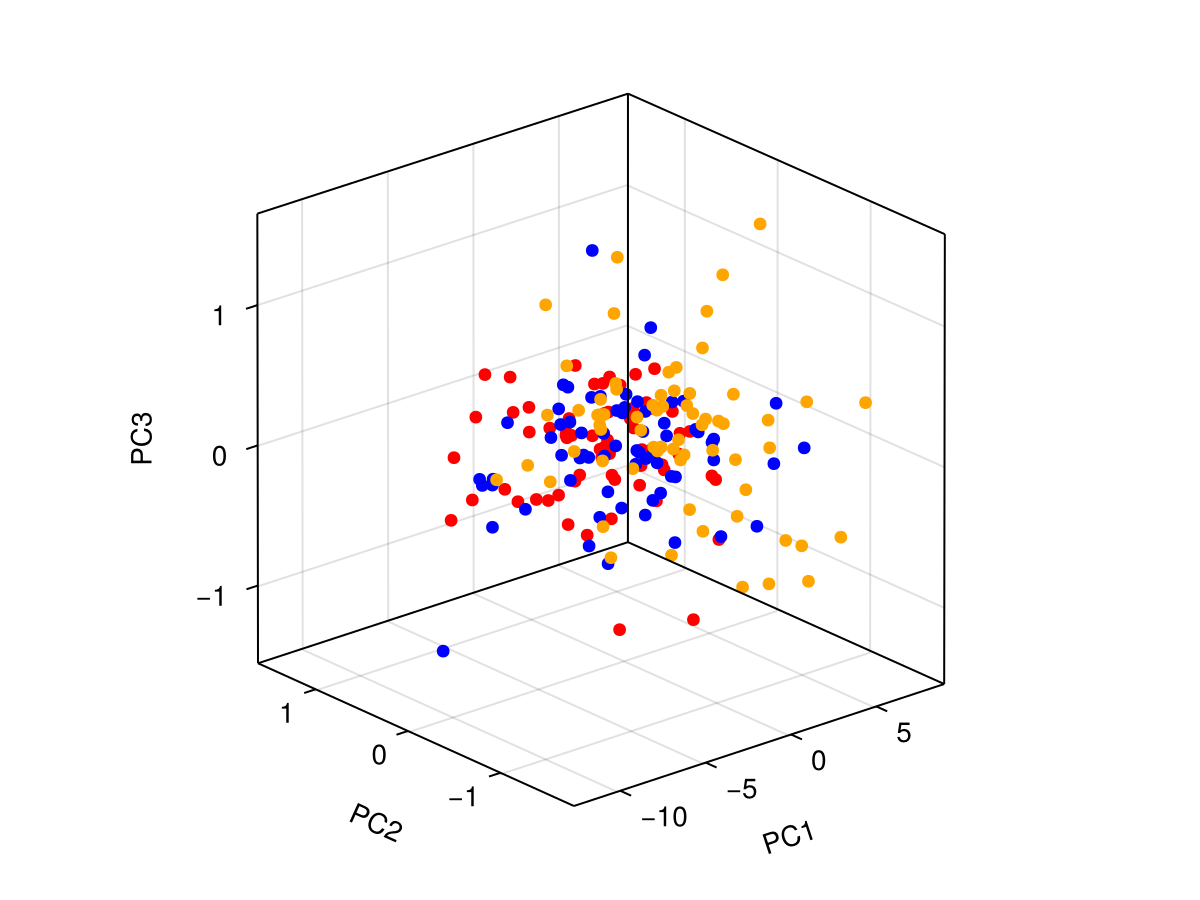

In [61]:
fig = Figure()
ax = Axis3(fig[1,1],
    aspect = (1, 1, 1),
    xlabel = "PC1",
    ylabel = "PC2",
    zlabel = "PC3")
CairoMakie.scatter!(ax,x1, color=:red)
CairoMakie.scatter!(ax,x2, color=:blue)
CairoMakie.scatter!(ax,x3, color=:orange)
fig

In [57]:
result = kmeans(x', 3)

Clustering.KmeansResult{Matrix{Float64}, Float64, Int64}([4.008366360752132 -5.21120761281643 -0.6542014763491522; -0.1359535944891916 -0.17618034509370273 0.0005246270963441509; -0.007456446844926389 -0.10677814631538955 0.0536703967620347], [2, 2, 3, 2, 2, 2, 2, 3, 2, 3  …  1, 1, 3, 3, 3, 1, 3, 2, 1, 1], [3.1615800262183527, 42.38161296657178, 2.1076801649625896, 1.001826076783395, 0.7395872071116472, 0.46828013631721177, 0.20805042186370315, 3.1911995037431007, 15.794401694547687, 2.5695571843115417  …  0.9971328964566517, 1.235712944064204, 0.19313522133331784, 3.4922335612337765, 0.8078638523381604, 3.6393633367612637, 1.2855330020973983, 3.5508485699448897, 5.788056140813005, 0.18593385246271765], [62, 34, 104], [62, 34, 104], 493.4008492560338, 9, true)

In [58]:
result.assignments

200-element Vector{Int64}:
 2
 2
 3
 2
 2
 2
 2
 3
 2
 3
 2
 3
 3
 ⋮
 1
 2
 1
 1
 3
 3
 3
 1
 3
 2
 1
 1

In [59]:
xk1 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 1]
xk2 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 2]
xk3 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 3]

104-element Vector{Point{3, Float32}}:
 [-2.0842285, 0.20748131, 0.19463873]
 [-2.3318477, -0.53351974, 0.35615835]
 [-2.24448, 0.20156574, 0.066076115]
 [-2.3335307, -0.61472243, 0.11311303]
 [-1.7378525, 0.20417438, 0.5588677]
 [-2.555985, 0.15330236, 0.11079364]
 [-0.17235962, 1.4693877, 0.059068464]
 [-0.8427206, 0.10265314, -0.041752554]
 [-1.3467444, -0.07982053, 0.29629982]
 [-0.18238614, -1.0562744, -0.36728647]
 [-0.06498865, 0.16510947, -0.026163792]
 [-2.466747, 0.16581932, 0.12531644]
 [-0.25624928, -0.99463195, 0.069491856]
 ⋮
 [-0.7840489, 0.3443921, 0.16099808]
 [-0.14214875, 1.3496528, -0.65626574]
 [-0.2813599, 0.56539875, 0.39242142]
 [-1.723234, 0.720887, -0.30438918]
 [-0.311691, 0.78748375, 0.76184535]
 [0.8273545, 0.41745034, 0.043607313]
 [-1.4739801, -0.041322216, -0.057555858]
 [0.18192516, 0.29501596, 0.031070039]
 [-0.29002333, 0.23069067, 0.14046371]
 [1.2056063, -0.13890702, -0.06425838]
 [-0.5784898, -0.6191263, -0.5929858]
 [0.43941557, 0.2965836, 0.09707

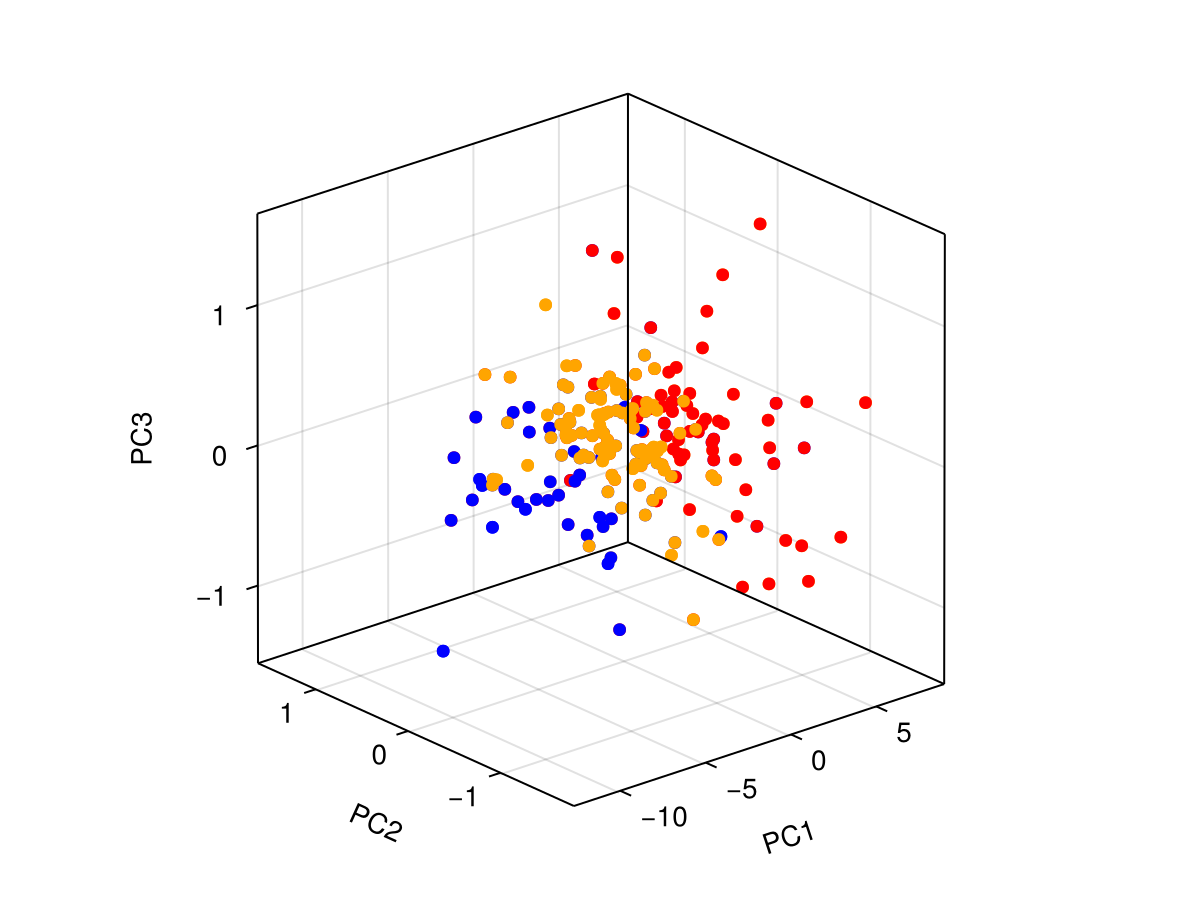

In [62]:
figk = Figure()
axk = Axis3(figk[1,1],
    aspect = (1, 1, 1),
    xlabel = "PC1",
    ylabel = "PC2",
    zlabel = "PC3")
CairoMakie.scatter!(ax,xk1, color=:red)
CairoMakie.scatter!(ax,xk2, color=:blue)
CairoMakie.scatter!(ax,xk3, color=:orange)
fig

In [57]:
Xtr

4×100 adjoint(::Matrix{Float64}) with eltype Float64:
 12.8207  12.4574  14.1287  13.4528  …  11.4053  11.4766  11.0029  7.63374
 12.8918  12.0532  14.2429  13.6931     11.1601  12.0894  10.822   8.22212
 13.0499  12.0     13.9356  13.5572     11.2402  11.526   10.8492  8.2919
 13.2608  12.7898  14.8116  14.002      11.908   11.246   11.5775  8.23933

In [9]:
Xtr = Matrix(m[1:2:end,1:4])'
pca3 = fit(PCA, Xtr; maxoutdim=3)

PCA(indim = 4, outdim = 3, principalratio = 0.9964463511856516)

Pattern matrix (unstandardized loadings):
──────────────────────────────────
       PC1         PC2         PC3
──────────────────────────────────
1  1.66647   0.101347   -0.193018
2  1.6642    0.0806263   0.304683
3  1.61943   0.264364   -0.0755816
4  1.75368  -0.416946   -0.0359216
──────────────────────────────────

Importance of components:
──────────────────────────────────────────────────────────
                                 PC1        PC2        PC3
──────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  11.2446    0.260504   0.13709
Variance explained          0.962417  0.0222963  0.0117334
Cumulative variance         0.962417  0.984713   0.996446
Proportion explained        0.965849  0.0223758  0.0117753
Cumulative proportion       0.965849  0.988225   1.0
──────────────────────────────────────────────────────────

In [10]:
Xte = Matrix(m[2:2:end,1:4])'
Yte = predict(pca3, Xte)

3×100 Matrix{Float64}:
 -11.7192      -4.33945   -5.81971   …   2.55076   -3.40318    4.40137
  -0.300655     0.220267  -0.471821     -1.09289   -0.486998  -0.145234
   0.00468028   0.184237  -0.209763     -0.781415  -0.537213  -0.184646

In [11]:
Xr = reconstruct(pca3, Yte)

4×100 Matrix{Float64}:
 17.096   13.4187  14.0864  12.6603  …  10.6048   9.75189  12.7178  8.95513
 17.0197  13.1272  14.2954  12.1085     10.6365  10.7098   13.368   9.15058
 17.0315  13.2344  14.2273  12.6904     10.6918  10.3899   13.0013  9.12717
 17.4459  14.0295  14.2     12.3805     10.812    9.25967  12.8921  9.1239

In [12]:
reconstruction_error = mean(sum((Xte - Xr).^2, dims=1))

0.05922147467805029

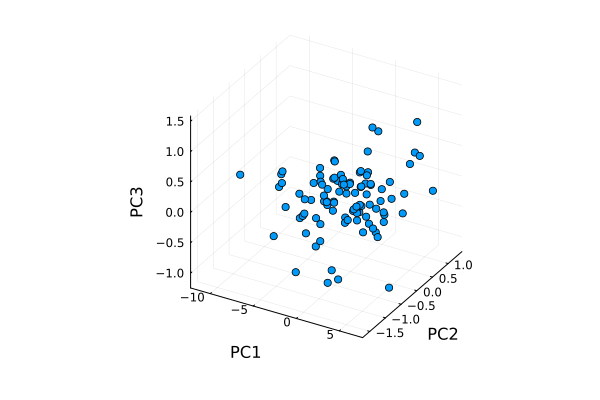

In [13]:
p = Plots.scatter(Yte[1,:],Yte[2,:],Yte[3,:],marker=:circle,linewidth=0)
Plots.plot!(p,xlabel="PC1",ylabel="PC2",zlabel="PC3",legend = nothing)

In [21]:
Xtr = Matrix(m[1:2:end,1:4])'
pca3 = fit(PCA, Xtr; maxoutdim=3)
Xte = Matrix(m[2:2:end,1:4])'
Yte = predict(pca3, Xte)
Xr = reconstruct(pca3, Yte)
how should I calculate the accuracy of the pca model

LoadError: UndefVarError: `how` not defined

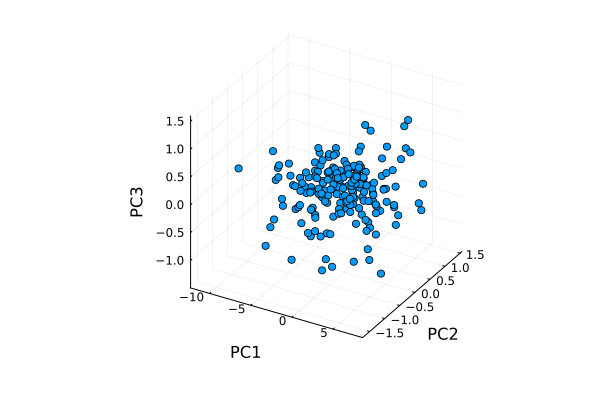

In [14]:
Xm = Matrix(m)'
Ym = predict(pca3, Xm)
p = Plots.scatter(Ym[1,:],Ym[2,:],Ym[3,:],marker=:circle,linewidth=0)
Plots.plot!(p,xlabel="PC1",ylabel="PC2",zlabel="PC3",legend = nothing)

In [196]:
Pkg.add(["Plots","ModelingToolkit","OrdinaryDiffEq","Lux","ADTypes","Optimisers","MLUtils","Zygote"])

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [210]:
Pkg.add(["CUDA","AMDGPU"])

   Resolving package versions...
   Installed Xorg_libxcb_jll ────────── v1.17.0+1
   Installed Xorg_libXext_jll ───────── v1.3.6+1
   Installed demumble_jll ───────────── v1.3.0+0
   Installed NVTX ───────────────────── v0.3.5
   Installed KernelAbstractions ─────── v0.9.30
   Installed GPUCompiler ────────────── v0.27.8
   Installed AcceleratedKernels ─────── v0.1.0
   Installed JuliaNVTXCallbacks_jll ─── v0.2.1+0
   Installed LLVM_jll ───────────────── v15.0.7+10
   Installed CUDA_Driver_jll ────────── v0.10.4+0
   Installed CUDA_Runtime_jll ───────── v0.15.5+0
   Installed UnsafeAtomicsLLVM ──────── v0.2.2
   Installed FreeType2_jll ──────────── v2.13.3+1
   Installed AMDGPU ─────────────────── v1.0.5
   Installed SciMLBase ──────────────── v2.65.1
   Installed NVTX_jll ───────────────── v3.1.0+2
   Installed CUDA_Runtime_Discovery ─── v0.3.5
   Installed ROCmDeviceLibs_jll ─────── v5.6.1+1
   Installed Xorg_libX11_jll ────────── v1.8.6+1
   Installed LLVMLoopInfo ───────────── v1.

In [234]:
Pkg.add("LuxAMDGPU")

   Resolving package versions...
   Installed Expat_jll ───────────────── v2.6.4+1
   Installed EpollShim_jll ───────────── v0.0.20230411+1
   Installed GPUCompiler ─────────────── v0.26.5
   Installed obstack_jll ─────────────── v1.2.3+0
   Installed Xorg_libpciaccess_jll ───── v0.16.0+1
   Installed Elfutils_jll ────────────── v0.189.0+1
   Installed hsakmt_roct_jll ─────────── v5.5.1+0
   Installed SimpleNonlinearSolve ────── v1.12.3
   Installed ROCmOpenCLRuntime_jll ───── v5.4.4+0
   Installed Xorg_xorgproto_jll ──────── v2019.2.0+2
   Installed ROCmCompilerSupport_jll ─── v5.4.4+0
   Installed LinearSolve ─────────────── v2.34.0
   Installed NonlinearSolve ──────────── v3.14.0
   Installed Flux ────────────────────── v0.14.17
   Installed AMDGPU ──────────────────── v0.9.6
   Installed LazyArrays ──────────────── v2.3.0
   Installed LLVMExtra_jll ───────────── v0.0.29+0
   Installed hsa_rocr_jll ────────────── v5.4.4+0
   Installed SCCNonlinearSolve ───────── v1.0.0
   Installed 

In [270]:
using Lux, ADTypes,LuxAMDGPU, LuxCUDA, Optimisers, Printf, Random, Statistics, Zygote
using CairoMakie,CUDA, AMDGPU

[ Info: Precompiling LuxAMDGPU [83120cb1-ca15-4f04-bf3b-6967d2e6b60b]
┌ Warning: DEPRECATION NOTICE
│ 
│ `LuxAMDPU.jl` was used previously as a means to load `AMDGPU` specific extensions in
│ `Lux.jl`. However in most recent versions of `Lux.jl`, these functionalities can be
│ directly accessed by simply loading `AMDGPU.jl`. This package is now deprecated.
│ 
│ To use the `LuxAMDGPU.functional()` functionality, use
│ `MLDataDevices.functional(LuxAMDGPUDevice)`.
│ 
│ If you are not using `LuxAMDGPU.jl` as a direct dependency, please consider
│ opening an issue on any packages you are using that do use it as a dependency.
│ From Julia 1.9 onwards, you can query `]why LuxAMDGPU` to figure out which
│ package originally brings it in as a dependency.
└ @ LuxAMDGPU C:\Users\Owner\.julia\packages\LuxAMDGPU\IvrUd\src\LuxAMDGPU.jl:4
ERROR: LoadError: UndefVarError: `SimplifyCFGPassOptions` not defined
Stacktrace:
 [1] top-level scope
   @ C:\Users\Owner\.julia\packages\GPUCompiler\nWT2N\src\opt

LoadError: Failed to precompile LuxAMDGPU [83120cb1-ca15-4f04-bf3b-6967d2e6b60b] to "C:\\Users\\Owner\\.julia\\compiled\\v1.10\\LuxAMDGPU\\jl_6104.tmp".

In [271]:
function generate_data(rng::AbstractRNG)
    x = reshape(collect(range(-2.0f0, 2.0f0, 128)), (1, 128))
    y = evalpoly.(x, ((0, -2, 1),)) .+ randn(rng, (1, 128)) .* 0.1f0
    return (x, y)
end

generate_data (generic function with 1 method)

In [272]:
rng = MersenneTwister()
Random.seed!(rng, 12345)

(x, y) = generate_data(rng)

(Float32[-2.0 -1.968504 … 1.968504 2.0], [8.11723579535073 7.8972862806322315 … -0.21213293699653427 0.049985105882301])

In [273]:
begin
    fig = Figure()
    ax = CairoMakie.Axis(fig[1, 1]; xlabel="x", ylabel="y")

    l = lines!(ax, x[1, :], x -> evalpoly(x, (0, -2, 1)); linewidth=3, color=:blue)
    s = scatter!(ax, x[1, :], y[1, :]; markersize=12, alpha=0.5,
        color=:orange, strokecolor=:black, strokewidth=2)

    axislegend(ax, [l, s], ["True Quadratic Function", "Data Points"])

    fig
end

LoadError: UndefVarError: `scatter!` not defined

In [274]:
rng=log.(F2D)

200×1 Matrix{Float64}:
 12.82073819290967
 17.09053053828624
 12.45741306663993
 13.432675959626803
 14.128715069824407
 14.022957170416982
 13.452793504331463
 12.57721499602651
 15.819643632819545
 12.331814313312298
 13.757667419153679
 12.56665550799872
 12.620969538518624
  ⋮
  9.210794920653278
 12.876890879314471
  8.897415104141137
  8.766682656041292
 11.40531478692814
 10.50003416955464
 11.476588520476263
  9.943373343995026
 11.002897727808046
 12.178040921795503
  7.633737091844984
  8.733229759043768

In [275]:
model = Chain(Dense(1 => 16, relu), Dense(16 => 1))

Chain(
    layer_1 = Dense(1 => 16, relu),     # 32 parameters
    layer_2 = Dense(16 => 1),           # 17 parameters
)         # Total: 49 parameters,
          #        plus 0 states.

In [276]:
opt = Adam(0.03f0)

Adam(0.03, (0.9, 0.999), 1.0e-8)

In [277]:
function loss_function(model, ps, st, data)
    y_pred, st = Lux.apply(model, data[1], ps, st)
    mse_loss = mean(abs2, y_pred .- data[2])
    return mse_loss, st, ()
end

loss_function (generic function with 1 method)

In [278]:
tstate = Lux.Experimental.TrainState(rng, model, opt)

LoadError: UndefVarError: `TrainState` not defined

In [253]:
vjp_rule = AutoZygote()

AutoZygote()

In [254]:
function main(tstate::Lux.Experimental.TrainState, vjp, data, epochs)
    data = data .|> gpu_device()
    for epoch in 1:epochs
        grads, loss, stats, tstate = Lux.Training.compute_gradients(
            vjp, loss_function, data, tstate)
        if epoch % 50 == 1 || epoch == epochs
            @printf "Epoch: %3d \t Loss: %.5g\n" epoch loss
        end
        tstate = Lux.Training.apply_gradients(tstate, grads)
    end
    return tstate
end

dev_cpu = cpu_device()
dev_gpu = gpu_device()

tstate = main(tstate, vjp_rule, (x, y), 250)
y_pred = dev_cpu(Lux.apply(tstate.model, dev_gpu(x), tstate.parameters, tstate.states)[1])

LoadError: UndefVarError: `TrainState` not defined

In [ ]:
begin
    fig = Figure()
    axk = CairoMakie.Axis3(figk[1, 1],aspect = (1, 1, 1), xlabel="PC1", ylabel="PC2", zlabel="PC3")

    l = lines!(ax, x[1, :], x -> evalpoly(x, (0, -2, 1)); linewidth=3)
    s1 = scatter!(ax, x[1, :], y[1, :]; markersize=12, alpha=0.5,
        color=:orange, strokecolor=:black, strokewidth=2)
    s2 = scatter!(ax, x[1, :], y_pred[1, :]; markersize=12, alpha=0.5,
        color=:green, strokecolor=:black, strokewidth=2)

    axislegend(ax, [l, s1, s2], ["True Quadratic Function", "Actual Data", "Predictions"])

    fig
end
figk = Figure()
axk = Axis3(figk[1,1],
    aspect = (1, 1, 1),
    xlabel = "PC1",
    ylabel = "PC2",
    zlabel = "PC3")
CairoMakie.scatter!(ax,xk1, color=:red)
CairoMakie.scatter!(ax,xk2, color=:blue)
CairoMakie.scatter!(ax,xk3, color=:orange)
fig

In [11]:
Pkg.add("Flux")
Pkg.add("StatsPlots")
using Flux,StatsPlots

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
   Installed TableOperations ─ v1.2.0
   Installed StatsPlots ────── v0.15.7
    Updating `C:\Users\Owner\Project.toml`
  [f3b207a7] + StatsPlots v0.15.7
    Updating `C:\Users\Owner\Manifest.toml`
  [f3b207a7] + StatsPlots v0.15.7
  [ab02a1b2] + TableOperations v1.2.0
Precompiling project...
  ✓ TableOperations
  ✓ StatsPlots
  2 dependencies successfully precompiled in 6 seconds. 818 already precompiled. 1 skipped during auto due to previous errors.


In [13]:
Pkg.add("IterTools")
using IterTools

   Resolving package versions...
    Updating `C:\Users\Owner\Project.toml`
  [c8e1da08] + IterTools v1.10.0
  No Changes to `C:\Users\Owner\Manifest.toml`


In [18]:
using Flux
using StatsPlots
using IterTools: ncycle
xvals = collect(Float32, range(-10.0, 10.0, length=1000))
xvals = reshape(xvals, (1, 1000))
yvals = 0.1f0.*xvals'.*cos.(xvals') + 0.1f0*randn(Float32, length(xvals))
StatsPlots.scatter(xvals', yvals, ms=0.1, linewidth=0, markerstrokewidth=0, legend=nothing)
approx = Chain(
    Dense(1, 64),
    Dense(64, 64, relu),
    Dense(64, 64, relu),
    Dense(64, 1)
)
loss(x, y) = Flux.Losses.mse(approx(x)', y)
trainer = Flux.Data.DataLoader((xvals, yvals[:, 1]), shuffle=true, batchsize=32)
Flux.train!(loss, params(approx), ncycle(trainer, 100), ADAM(0.01))
StatsPlots.scatter!(xvals', yvals, ms=0.1, linewidth=0, markerstrokewidth=0, legend=nothing)
plot!(xvals', approx(xvals)')

LoadError: UndefVarError: `params` not defined

In [103]:
F2D=vec(F2D)
F5PG=vec(F5PG)
P5PG=vec(P5PG)
Psus=vec(Psus)

200-element Vector{Float64}:
 13.260760807865086
 17.447727888918607
 12.789781923063618
 14.024784188290308
 14.811566762655165
 14.221286794333688
 14.001988789636291
 12.408342275741855
 16.49833665404236
 12.903058268335926
 13.786671938575791
 12.28602595213063
 12.592562045969864
  ⋮
  9.17055781288903
 13.15683374976418
  9.899457383804986
  8.438798509668331
 11.907984065385724
 10.847202398563468
 11.24597415236502
  9.195420913383195
 11.577539746675395
 13.073176168923235
  8.239327416017014
  9.198364909507514

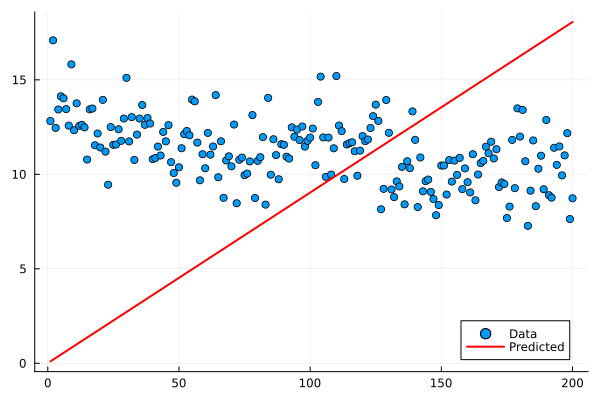

In [106]:
using Random
using Plots
using Flux

# Generate the data
x_data = (1:200)
y_data = F2D
a_data=F5PG
b_data=P5PG
c_data=Psus

# Define the model
model = Chain(
    Dense(1, 64, relu),  # First layer: 1 input, 64 neurons, ReLU activation
    Dense(64, 64, relu), # Second layer: 64 inputs, 64 neurons, ReLU activation
    Dense(64, 1)         # Output layer: 64 inputs, 1 output, linear activation
)

# Define loss function and optimizer
loss(x, y) = Flux.Losses.mse(model(x), y)
loss(x, a) = Flux.Losses.mse(model(x), y)
loss(x, b) = Flux.Losses.mse(model(x), y)
loss(x, c) = Flux.Losses.mse(model(x), y)
opt = Flux.ADAM()

# Prepare data for training
x_train = reshape(collect(x_data), 1, :)  # Reshape 
y_train = reshape(collect(y_data), 1, :)   
a_train = reshape(collect(a_data), 1, :)   
b_train = reshape(collect(b_data), 1, :)   
c_train = reshape(collect(c_data), 1, :)   

# Train the model
Flux.train!(loss, Flux.params(model), [(x_train, y_train)], opt)
Flux.train!(loss, Flux.params(model), [(x_train, a_train)], opt)
Flux.train!(loss, Flux.params(model), [(x_train, b_train)], opt)
Flux.train!(loss, Flux.params(model), [(x_train, c_train)], opt)

# Compute the output
y_predicted = model(x_train)
a_predicted = model(x_train)
b_predicted = model(x_train)
v_predicted = model(x_train)

# Plot the results
Plots.scatter(x_data, y_data, label="Data")
Plots.plot!(x_data, y_predicted', label="Predicted", color=:red, lw=2)


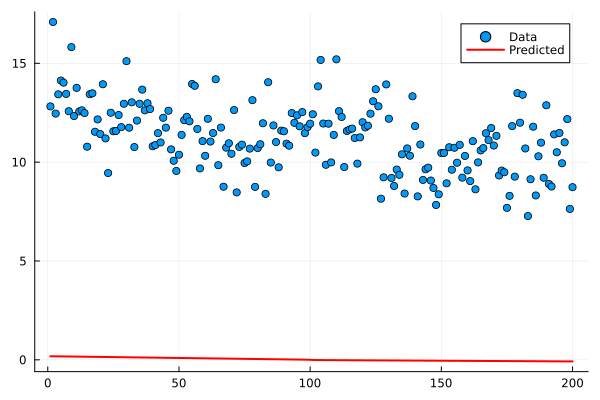

In [105]:
x_datan = (x_data .- mean(x_data)) ./ std(x_data)
y_datan = (y_data .- mean(y_data)) ./ std(y_data)

# Define the model
model = Chain(
    Dense(1, 128, relu),
    Dropout(0.2),  # 20% dropout
    Dense(128, 128, relu),
    Dropout(0.2),
    Dense(128, 1)
)
# Define loss function and optimizer
loss(x, y) = Flux.Losses.mse(model(x), y)
opt = Flux.ADAM(0.001)

# Prepare data for training
x_train = reshape(collect(x_datan), 1, :)  # Reshape 
y_train = reshape(collect(y_datan), 1, :)   

# Train the model
Flux.train!(loss, Flux.params(model), [(x_train, y_train)], opt)

# Compute the output
y_predicted = model(x_train)

# Plot the results
Plots.scatter(x_data, y_data, label="Data")
Plots.plot!(x_data, y_predicted', label="Predicted", color=:red, lw=2)
